In [16]:
%pylab inline
import pandas as pd
import numpy as np
import os
import sklearn as sk
import pickle
from sklearn.cluster import AffinityPropagation
from sklearn import datasets
from sklearn import metrics
from multiprocessing import Pool
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
from sklearn.decomposition import PCA

Populating the interactive namespace from numpy and matplotlib


Import cancer feature vector, neutral feature vector. Import edges dictionary. Map mutation to genes to find number of edges per mutation.

In [17]:
cancer_feature_vector = pd.read_csv('../data_frames/cancer_feature_vector_tcga.csv', index_col=0)
neutral_feature_vector = pd.read_csv('../data_frames/neutral_feature_vector_tcga.csv', index_col=0)
edges = pickle.load(open("../data_frames/edges.p", 'rb'))

In [18]:
def get_entrez(x):
    c = x.split("_")
    return c[0]

In [19]:
cancer_genes = list(cancer_feature_vector.SNP.map(get_entrez).astype(int))
neutral_genes = list(neutral_feature_vector.SNP.map(get_entrez).astype(int))

In [44]:
cancer_connections, neutral_connections = [], []
for gene in cancer_genes:
    cancer_connections.append(len(edges[gene]))
for gene in neutral_genes:
    try:
        neutral_connections.append(len(edges[gene]))
    except:
        neutral_connections.append(0)

In [45]:
cancer_connections_df = pd.DataFrame(cancer_connections)
cancer_connections_df.columns = ['num_of_edges']
neutral_connections_df = pd.DataFrame(neutral_connections)
neutral_connections_df.columns = ['num_of_edges']

In [46]:
cancer_connections_df.head()

,num_of_edges
0,213
1,213
2,448
3,448
4,486


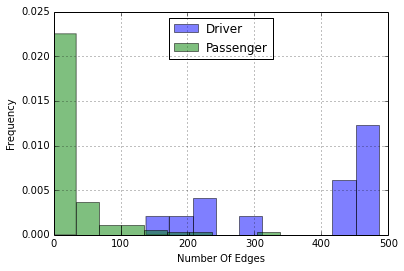

In [47]:
ax = cancer_connections_df.num_of_edges.hist(normed=True, alpha=0.5, color='b', label='Driver')
neutral_connections_df.num_of_edges.hist(normed=True, alpha=0.5, ax=ax, color='g', label='Passenger')
ax.set_xlabel("Number Of Edges")
ax.set_ylabel("Frequency")
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc=9)

Should create another figure with the (density)/(number of edges)

In [54]:
cancer_feature_vector['num_of_edges'] = list(cancer_connections_df.num_of_edges)
neutral_feature_vector['num_of_edges'] = list(neutral_connections_df.num_of_edges)

In [57]:
cancer_feature_vector['d_over_e'] = cancer_feature_vector.Density/cancer_feature_vector.num_of_edges
neutral_feature_vector['d_over_e'] = neutral_feature_vector.Density/neutral_feature_vector.num_of_edges

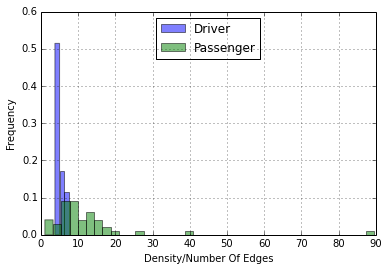

In [64]:
ax = cancer_feature_vector.d_over_e.hist(normed=True, alpha=0.5, color='b', label='Driver', bins=3)
neutral_feature_vector.d_over_e.hist(normed=True, alpha=0.5, ax=ax, color='g', label='Passenger', bins=40)
ax.set_xlabel("Density/Number Of Edges")
ax.set_ylabel("Frequency")
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc=9)